I will be working with the [Kaggle Microbes Dataset](https://www.kaggle.com/datasets/sayansh001/microbes-dataset) stored in `microbes.zip`. Novel DNA sequencing technologies have proliferated over the past two decades. Continual improvements in “next-generation sequencing” (NGS) and “third-generation sequencing” (TGS) have increased the fidelity and rate of sequencing, but it still takes hours or days to obtain complete sequences. Furthermore, there are some diagnostic applications in which very rapid identification of a particular gene or genetic species becomes essential, while identification of all genes is not necessary. For example, in patients with septic shock from bacterial infections, identification of antibiotic-resistance genes is essential because the mortality rate increases 7.6% per hour of delay in administering correct antibiotics. Unfortunately, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections.

Bacterial antibiotic resistance is becoming a significant health threat, and rapid identification of antibiotic-resistant bacteria is essential to save lives and reduce the spread of antibiotic resistance.

Microbes Dataset is a dataset for ten different micro-forms of life (Spirogyra, Volvox, Pithophora, Yeast, Raizopus, Penicillum, Aspergillus sp, Protozoa, Diatom, Ulothrix). Some features are:

1. Solidity(It is the ratio of area of an object to the area of a convex hull of the object. Computed as Area/ConvexArea.)
2. Eccentricity(The eccentricity is the ratio of length of major to minor axis of an object.)
3. EquivDiameter(Diameter of a circle with the same area as the region.)
4. Extrema(Extrema points in the region.)
5. FilledArea(Number of on pixels in FilledImage, returned as a scalar.)
6. Extent(Ratio of the pixel area of a region with respect to the bounding box area of an object.)
7. Orientation(The overall direction of the shape. The value ranges from -90 degrees to 90 degrees.) 
8. EulerNumber(Number of objects in the region minus the number of holes in those objects.)
9. BoundingBox1(Position and size of the smallest box (rectangle) which bounds the object.)

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline

# Read data using pandas

In [2]:
df_microbes = pd.read_csv("microbes.zip" , delimiter=",") #df = data frame -- read data using pd.read_csv() 
df_microbes = df_microbes.drop(['Unnamed: 0'], axis=1) # I remove column of 'Unnamed: 0' 
df_microbes[0:8] # Here are the first eight records

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.785,8.14,2.1500,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.364,3.51,18.6000,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.415,5.85,21.0000,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.470,6.30,9.9400,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.700,3.97,2.5800,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
5,9.47,18.4,4.27,14.60,0.400,7.29,20.1000,22.5,13.60,14.30,...,13.60,1.080,1.070,0.963,0.1360,14.10,15.50,0.812,7.99,Spirogyra
6,13.50,19.8,4.50,17.30,0.493,9.67,0.0334,22.2,16.80,6.67,...,16.90,1.170,0.981,0.381,0.1070,17.20,7.88,0.903,7.99,Spirogyra
7,15.60,19.6,4.16,19.60,0.352,12.10,0.6270,22.3,19.30,11.50,...,19.30,0.979,0.845,0.328,0.0789,19.50,12.30,0.771,7.99,Spirogyra


# In the microbes dataset, the data in the column of microorganisms is encoded with strings. In order to work with these values, they must be encoded into numeric forms. To do this, I use a map().

In [3]:
df_microbes.microorganisms = df_microbes.microorganisms.map({'Spirogyra': 0, 'Volvox': 1, 'Pithophora': 2, 'Yeast': 3, 
        'Raizopus': 4, 'Penicillum': 5, 'Aspergillus sp': 6, 'Protozoa': 7, 'Diatom': 8, 'Ulothrix': 9}) 
df_microbes.sample(5) 

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
21293,4.82,14.8,5.69,6.99,0.5990,3.02,7.75,21.8,6.53,14.60,...,6.53,1.980,2.510,2.500,0.4670,7.55,17.10,1.430,5.900,8
13949,7.06,17.5,1.87,6.00,0.0662,4.78,7.18,22.9,5.86,3.08,...,5.86,0.565,0.605,0.422,0.0363,6.18,3.38,0.162,0.924,6
6241,5.03,21.8,6.73,14.60,0.9520,3.00,13.30,21.7,9.04,8.53,...,10.50,3.070,1.590,2.680,0.6250,11.70,10.00,2.000,7.050,2
4603,3.43,22.2,3.34,12.00,0.2000,1.43,3.88,22.4,11.60,17.50,...,11.60,2.540,1.100,0.800,0.2280,12.10,20.00,0.501,6.560,1
3507,10.30,16.6,4.97,17.20,0.4640,6.88,19.80,21.8,16.00,5.01,...,16.10,1.380,1.590,1.000,0.1700,16.90,6.16,1.100,9.930,1


**There are 30527 records in dataframe.**

In [4]:
df_microbes.shape

(30527, 25)

# In this section, I would like to test whether the dataframe contains NaN values

In [5]:
df_microbes.isnull().any().any()

False

**There are no NaN values**

# Descriptive statistics:

In [6]:
df_microbes.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598,5.414748
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199,2.933940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000,3.000000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000,6.000000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000,8.000000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,9.000000


# I use the Seaborn `heatmap()` function to determine which features have the most impact on `microorganisms`.

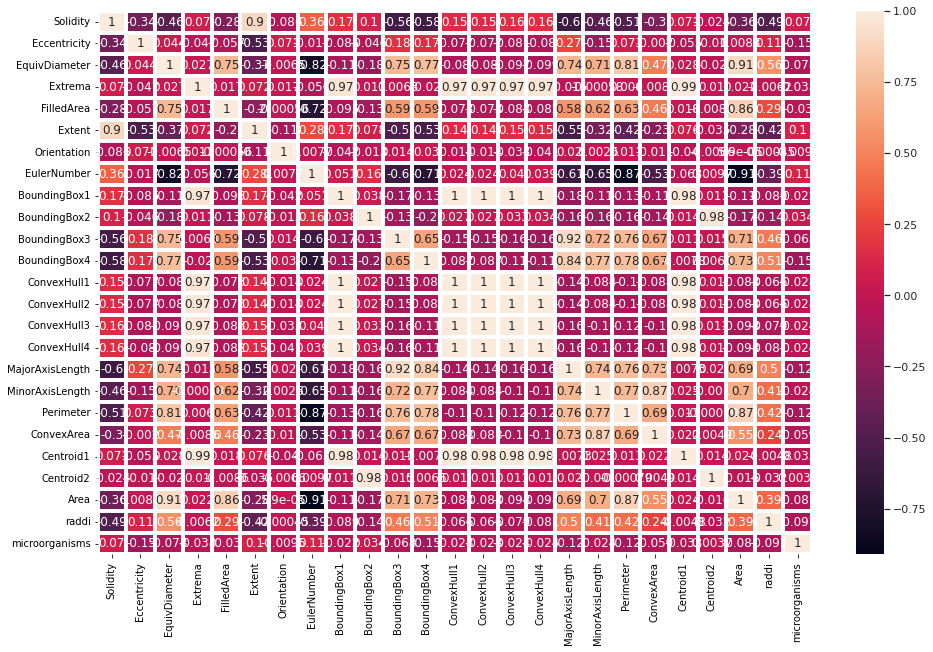

In [7]:
fig, ax = plt.subplots(figsize=(16,10))  
sns.set(font_scale=1.0)
sns.heatmap(df_microbes.corr() , annot= True, linewidths=3, ax=ax)

## Microorganisms is greatly influenced by:
### 1. EulerNumber(0.11)    
### 2. Extent(0.1)
### 3. Solidity(0.07) 

### I would like to visualize these three most influential features and the microorganisms.

## In order to have high-quality graphs, I rename columns as follows:
### 1. f1 = EulerNumber  
### 2. f2 = Extent 
### 3. f3 = Solidity


In [8]:
df_microbes_copy = df_microbes.rename(columns={"EulerNumber": "f1", "Extent": "f2", "Solidity": "f3"}) 
df_microbes_copy = df_microbes_copy[['f1', 'f2', 'f3', 'microorganisms']] 
df_microbes_copy.head()


,f1,f2,f3,microorganisms
0,22.3,8.14,10.70,0
1,22.5,3.51,5.60,0
2,22.4,5.85,8.32,0
3,21.9,6.30,10.10,0
4,11.9,3.97,6.27,0


### Data Visualization and Analysis:

<Figure size 720x576 with 0 Axes>

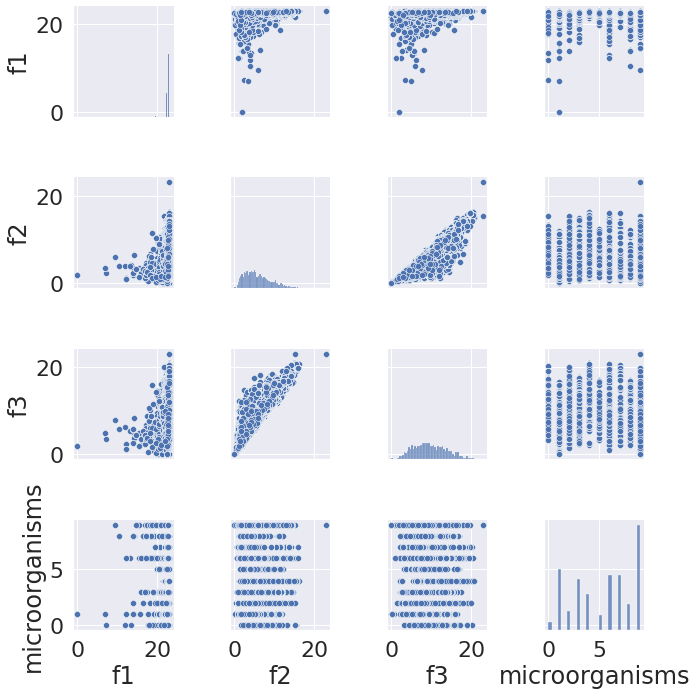

In [9]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2.0)
sns.pairplot(df_microbes_copy)

## Boxplots and outliers

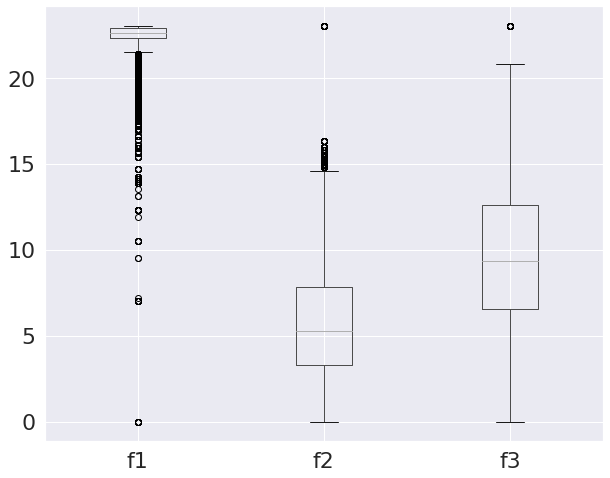

In [10]:
plt.figure(figsize=(10, 8))
boxplot = df_microbes_copy.boxplot(column=['f1','f2','f3']) 

# My next goal is to examine classic machine learning algorithms and TensorFlow.

# 1.TensorFlow

## I first split the DataFrame into X (data) and Y (labels), where:

In [11]:
X = df_microbes.drop(['microorganisms'], axis=1)
y = df_microbes['microorganisms']  

### Using a train-test split, I split X and Y into train and test data to evaluate the machine learning algorithm's performance.

*   Train Dataset: Used to fit the machine learning model.
*   Test Dataset: Used to evaluate the fit machine learning model.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## To convert DataFrame to a tensor, I use `tf.convert_to_tensor`

In [13]:
tf.convert_to_tensor(X_train) 

<tf.Tensor: shape=(22895, 24), dtype=float64, numpy=
array([[10.1  , 21.7  ,  5.7  , ...,  8.4  ,  1.44 ,  8.95 ],
       [ 9.45 , 20.1  ,  3.92 , ...,  2.72 ,  0.687,  4.81 ],
       [16.4  , 20.   ,  3.22 , ..., 12.6  ,  0.466,  5.29 ],
       ...,
       [ 3.69 , 20.4  ,  8.7  , ...,  8.78 ,  3.32 ,  8.06 ],
       [ 2.13 , 20.   , 14.1  , ...,  8.97 ,  8.69 , 13.8  ],
       [ 7.57 , 20.6  ,  3.2  , ..., 20.   ,  0.461,  4.95 ]])>

In [14]:
tf.convert_to_tensor(X_test) 

<tf.Tensor: shape=(7632, 24), dtype=float64, numpy=
array([[ 8.11 , 22.3  ,  4.35 , ...,  8.51 ,  0.844,  8.75 ],
       [12.9  , 20.3  ,  1.86 , ..., 12.5  ,  0.161,  1.3  ],
       [12.4  , 17.4  ,  4.43 , ..., 16.9  ,  0.873,  4.18 ],
       ...,
       [ 6.21 , 19.7  ,  5.3  , ..., 11.1  ,  1.24 ,  6.32 ],
       [ 5.88 , 21.2  ,  5.36 , ..., 20.8  ,  1.27 ,  8.7  ],
       [ 5.6  , 18.3  ,  4.14 , ..., 20.6  ,  0.765,  7.99 ]])>

## Normalize `X_train`

In [15]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train) 

## Compile and train the model

In [16]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [17]:
model = get_basic_model()

In [18]:
history = model.fit(X_train, y_train, epochs=350, validation_data=(X_test, y_test)) 

Epoch 1/350
716/716 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.4820 - val_loss: 1.2491 - val_accuracy: 0.5552
Epoch 2/350
716/716 [==============================] - 2s 3ms/step - loss: 1.1752 - accuracy: 0.5881 - val_loss: 1.1174 - val_accuracy: 0.6069
Epoch 3/350
716/716 [==============================] - 2s 3ms/step - loss: 1.0566 - accuracy: 0.6317 - val_loss: 1.0265 - val_accuracy: 0.6323
Epoch 4/350
716/716 [==============================] - 2s 2ms/step - loss: 0.9682 - accuracy: 0.6632 - val_loss: 0.9421 - val_accuracy: 0.6686
Epoch 5/350
716/716 [==============================] - 2s 2ms/step - loss: 0.8987 - accuracy: 0.6892 - val_loss: 0.8682 - val_accuracy: 0.7074
Epoch 6/350
716/716 [==============================] - 2s 3ms/step - loss: 0.8415 - accuracy: 0.7112 - val_loss: 0.8518 - val_accuracy: 0.7090
Epoch 7/350
716/716 [==============================] - 2s 3ms/step - loss: 0.7827 - accuracy: 0.7366 - val_loss: 0.7762 - val_accuracy: 0.7349

## Evaluate the model

I create plots from the collected history data.


1. A plot of accuracy on the training and validation datasets over training epochs.
2. A plot of loss on the training and validation datasets over training epochs.



239/239 - 0s - loss: 0.1744 - accuracy: 0.9843 - 297ms/epoch - 1ms/step


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


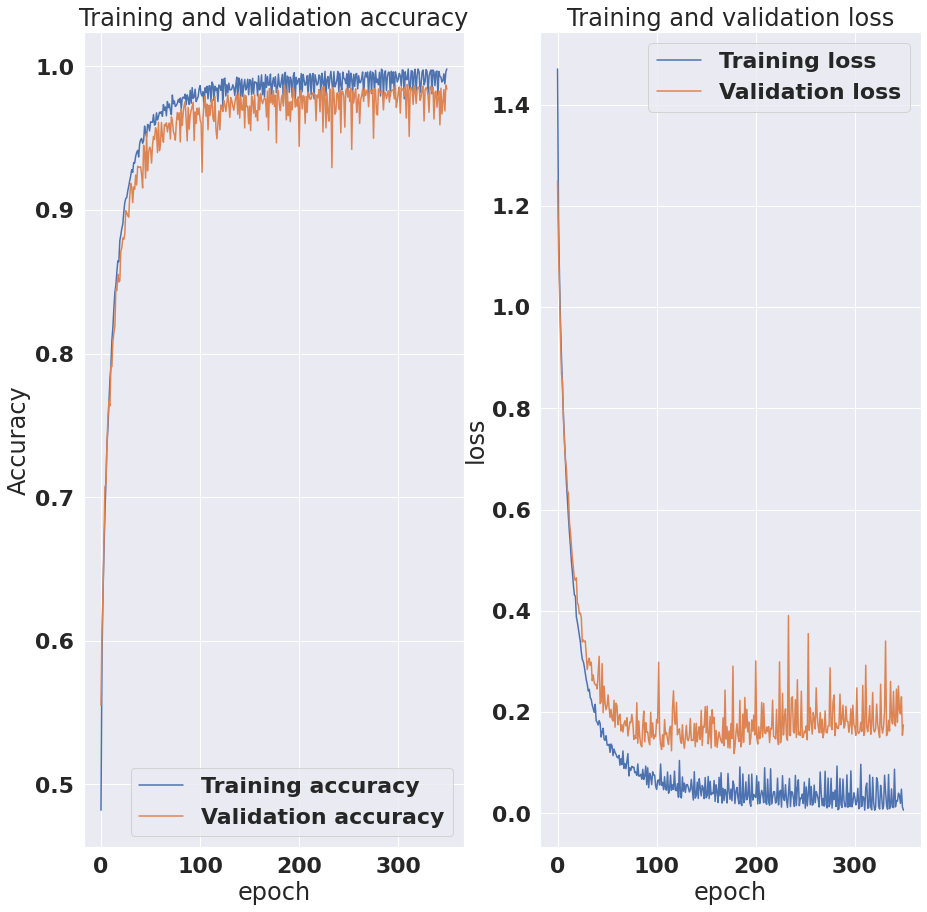

In [19]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

plt.figure(figsize=(15,15))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2) 

According to the plot of loss, validation loss is decreasing before the 100th epoch, so the model is underfitting. However, after the 100th epoch, validation loss is increasing, meaning the model is overfitting. Around the 100th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 96-97%.

The goal of Deep Learning training is to find a balance between a model that is underfitting and one that is overfitting, resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 100th epoch, as shown above. At that point, the training process can be stopped.

# 2. Classic machine learning algorithms

# Using train_test_split, split X and y into training and test sets

In [20]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DecisionTreeClassifier

### Using `X_train` and `y_train`, train a `DecisionTreeClassifier` with default parameters and random_state=0. 

In [21]:
DTClf = DecisionTreeClassifier(random_state = 0)  #DTClf = Decision Tree Classifier
DTClf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
Model_Prediction = DTClf.predict(X_test)

### In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [23]:
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction}
dfC = pd.DataFrame(data=d)
dfC.head(10)

,real or true values(y_test),Model_Prediction
9613,3,3
17531,7,7
9585,3,3
12187,4,4
3745,1,1
10241,4,4
18482,7,7
16205,6,6
29231,9,9
23803,9,9


### Model Accuracy

In [24]:
print('Accuracy of Decision Tree classifier on train set: {:.3f}' .format(DTClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}' .format(DTClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on train set: 1.000
Accuracy of Decision Tree classifier on test set: 0.985


### 98.5% of microbes can be distinguished using this model.

In [25]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ROC Curve & Precision-Recall for DecisionTreeClassifier

For the ROC Curve, the ideal curve is close to the top left: I want a classifier that produces a high
recall while keeping a low false positive rate. Also, for Precision_Recall, the closer a curve
 stays to the upper right corner, the better the classifier. A point at the upper right means high
precision and high recall for the same threshold.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


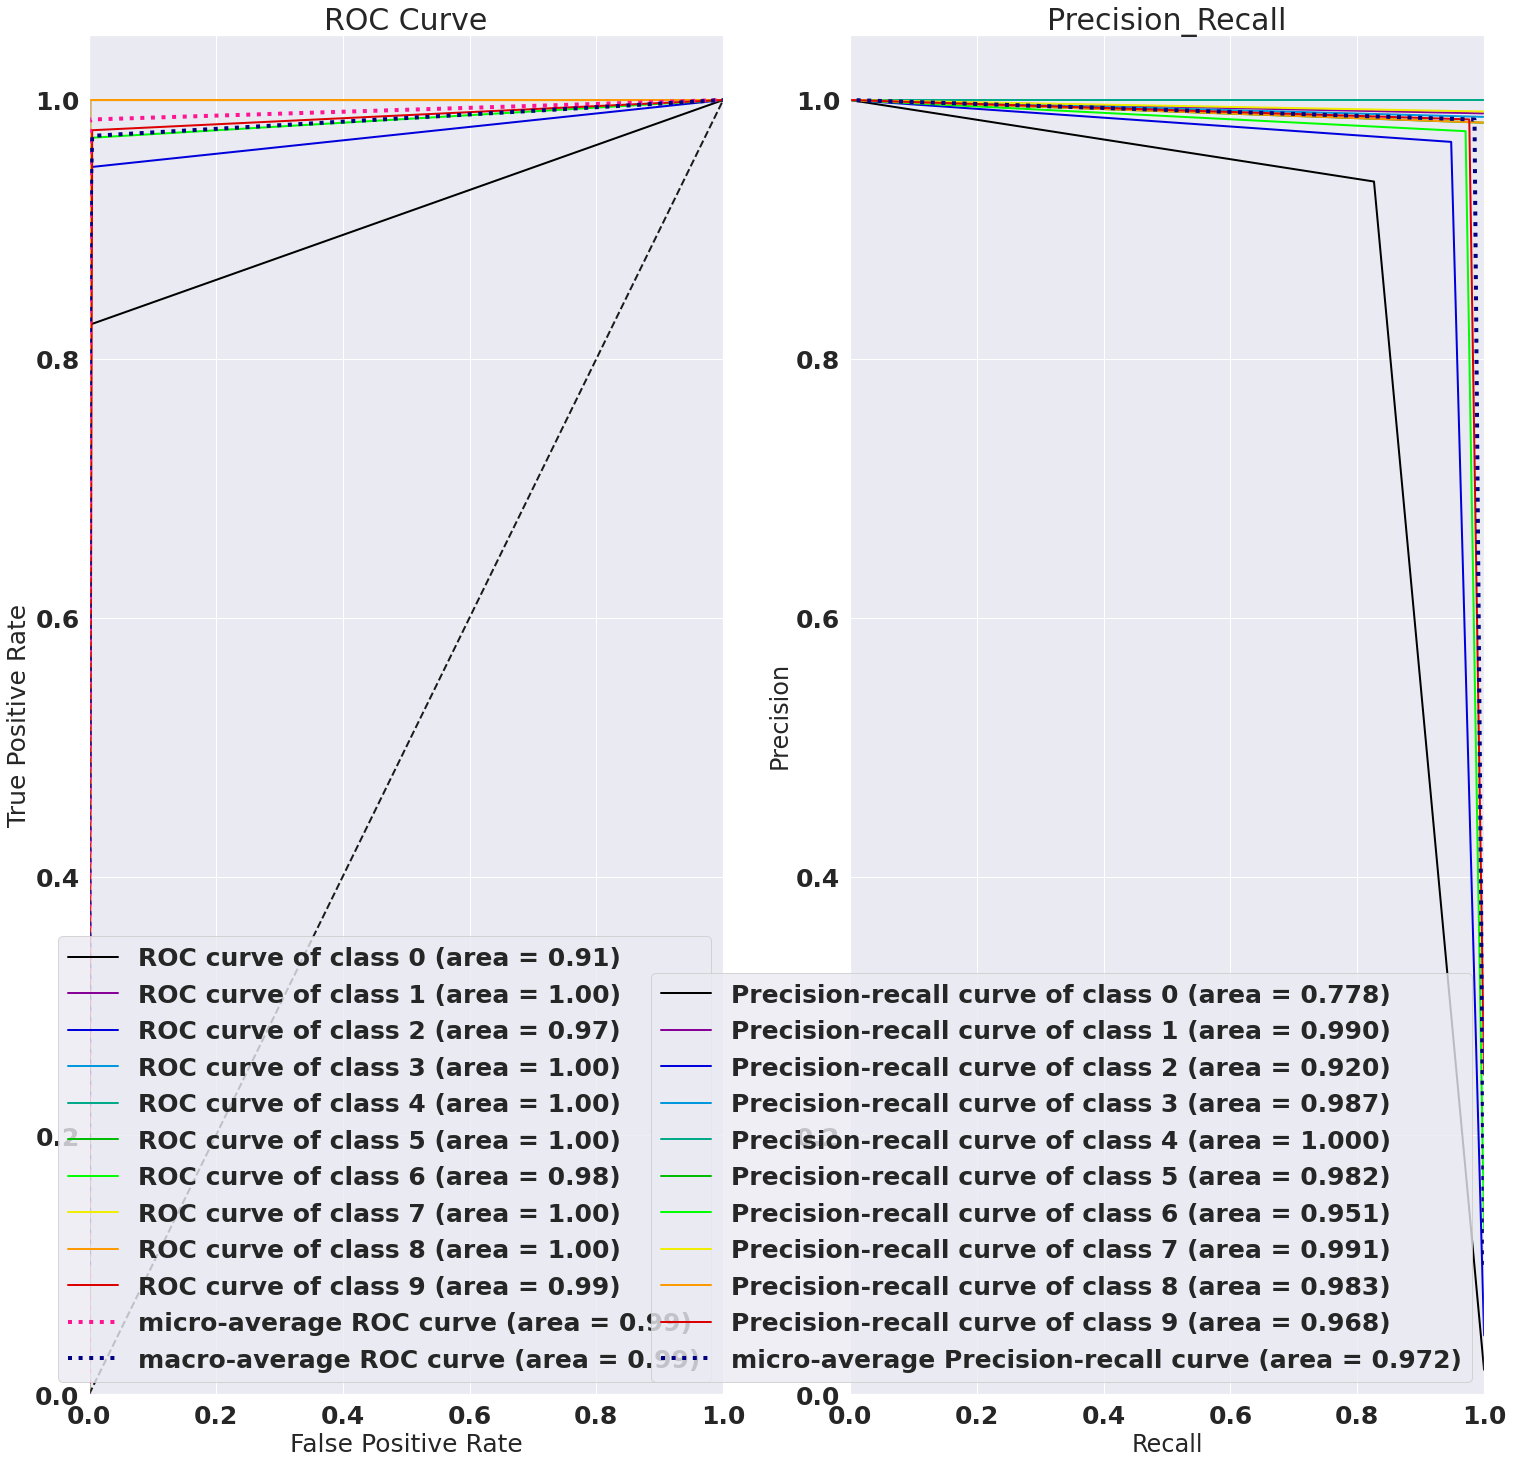

In [26]:
import scikitplot as skplt

plt.figure(figsize=(25,25))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

skplt.metrics.plot_roc(y_test, DTClf.predict_proba(X_test), ax=ax1,  title='ROC Curve') 
skplt.metrics.plot_precision_recall(y_test, DTClf.predict_proba(X_test), ax=ax2, title='Precision_Recall') 


plt.show()

# KNeighborsClassifier 

### Using `X_train` and `y_train`, train a `KNeighborsClassifier ` with default parameters and n_neighbors=1. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNClf = KNeighborsClassifier(n_neighbors = 1)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

### Model prediction

In [28]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
Model_Prediction_knn

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([6, 6, 6, ..., 6, 6, 6])

### Model Accuracy

In [29]:
print('Accuracy of KNeighborsClassifier on train set: {:.3f}' .format(KNClf.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.3f}' .format(KNClf.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on train set: 1.000
Accuracy of KNeighborsClassifier on test set: 0.988


### The model can distinguish 98.8% of microbes.

### Is `n_neighbors = 1 ` the best value? Yes, because:

In [30]:
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.98755241, 0.96540881, 0.95034067, 0.93383124, 0.92872117,
       0.90303983, 0.88417191, 0.85285639, 0.83949161, 0.81328616,
       0.78786688, 0.77476415, 0.76349581, 0.75497904])

### To better understand, I visualize previous cell to see better the relationship between `Accuracy ` and `Number of Neighbors(K)`.

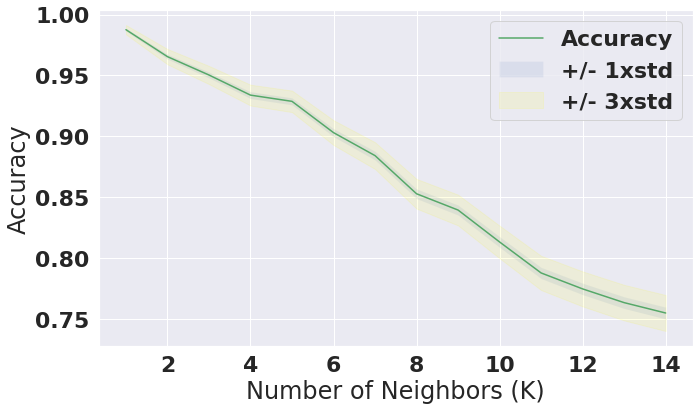

In [31]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='yellow')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
print("The best accuracy is {:.3f}" .format(mean_acc.max()), "with k =", mean_acc.argmax()+ 1)

The best accuracy is 0.988 with k = 1


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Model_Prediction_knn))

              precision    recall  f1-score   support

           0       0.02      0.31      0.04       144
           1       0.00      0.00      0.00      1053
           2       0.00      0.00      0.00       347
           3       0.00      0.00      0.00       908
           4       0.00      0.00      0.00       603
           5       0.00      0.00      0.00       280
           6       0.15      0.82      0.25       960
           7       0.00      0.00      0.00      1002
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00      1885

    accuracy                           0.11      7632
   macro avg       0.02      0.11      0.03      7632
weighted avg       0.02      0.11      0.03      7632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC Curve & Precision-Recall for KNeighborsClassifier

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


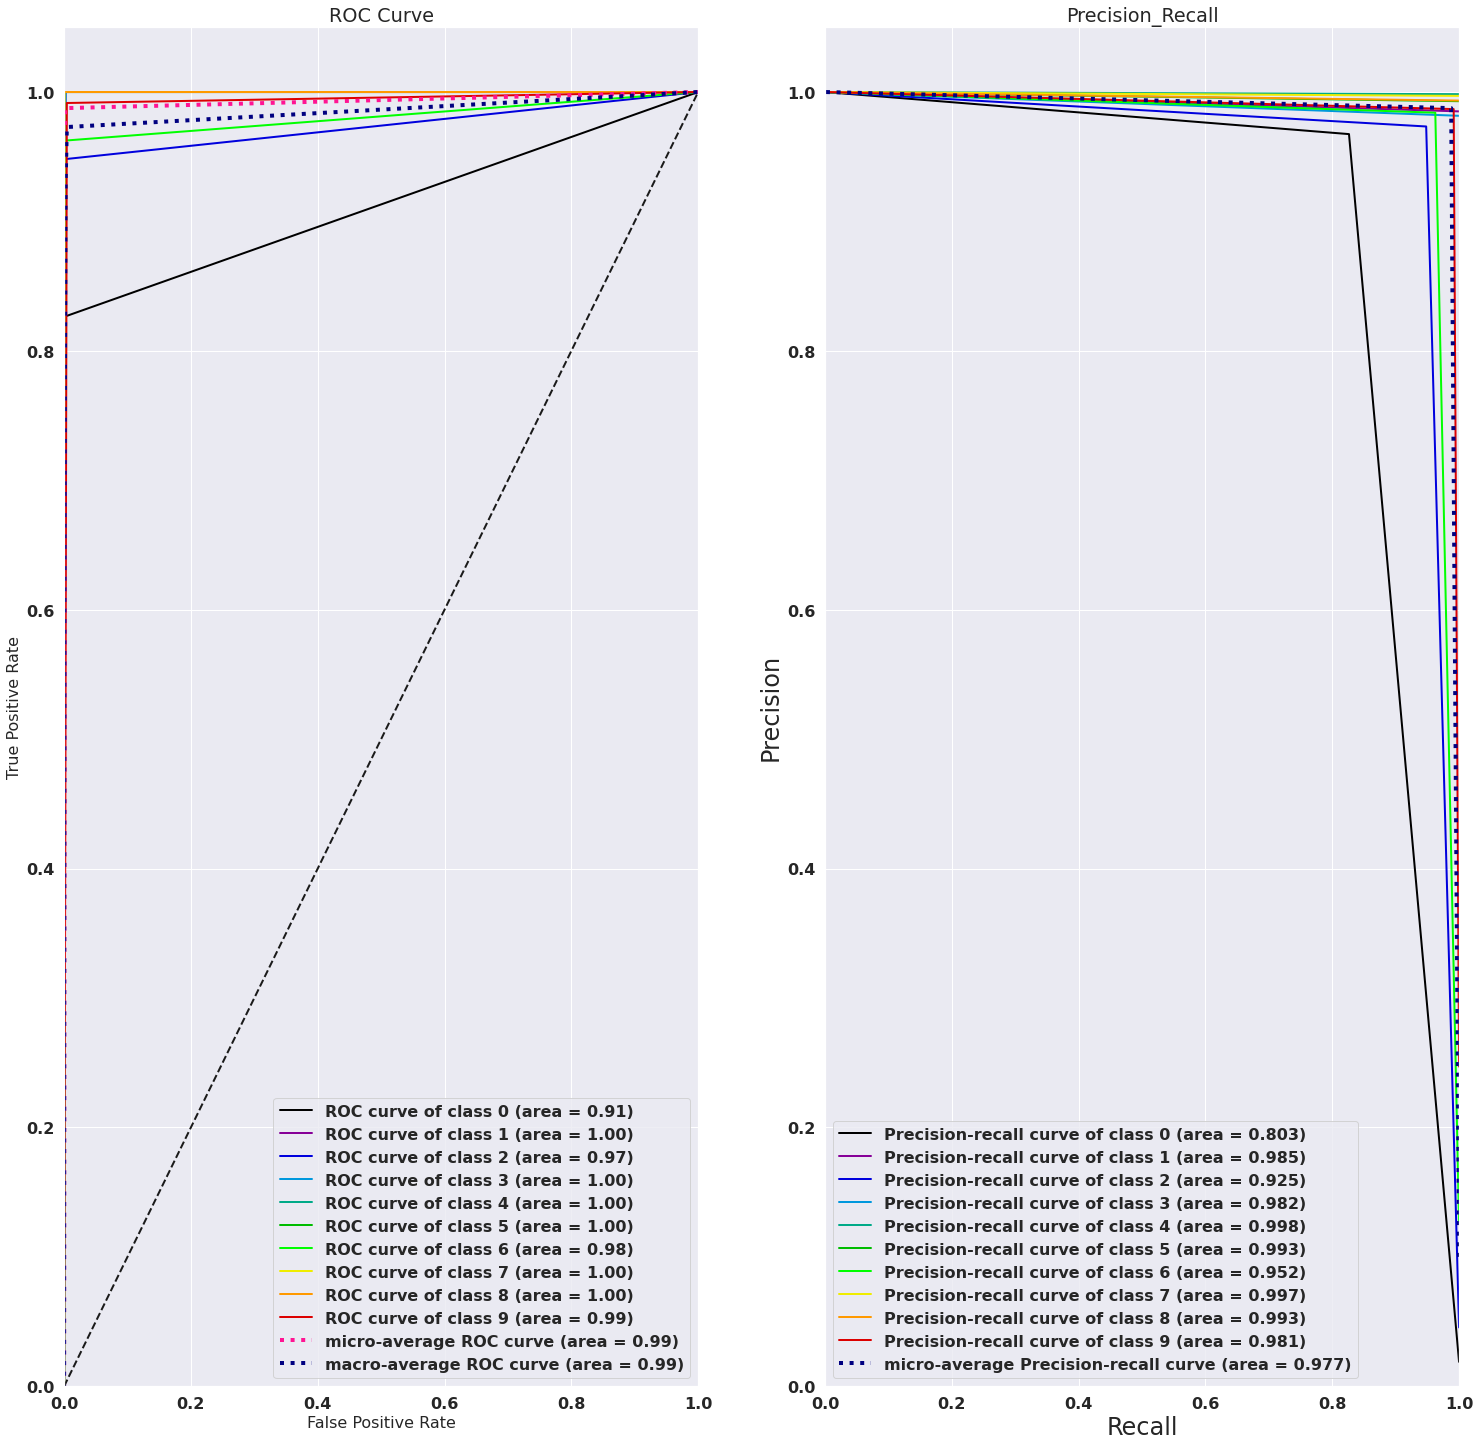

In [34]:
plt.figure(figsize=(25,25))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

skplt.metrics.plot_roc(y_test, KNClf.predict_proba(X_test), ax=ax1,  title='ROC Curve') 
skplt.metrics.plot_precision_recall(y_test, KNClf.predict_proba(X_test), ax=ax2, title='Precision_Recall') 


plt.show()

## In terms of Precision-Recall curves, the better algorithms for identifying different microorganisms are respectively:


### For class 0 ---> KNeighborsClassifier
### For class 1 ---> DecisionTreeClassifier
### For class 2 ---> KNeighborsClassifier
### For class 3 ---> DecisionTreeClassifier
### For class 4 ---> DecisionTreeClassifier
### For class 5 ---> KNeighborsClassifier
### For class 6 ---> KNeighborsClassifier
### For class 7 ---> KNeighborsClassifier
### For class 8 ---> KNeighborsClassifier
### For class 9 ---> KNeighborsClassifier